In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query1 = ''' SELECT r.rental_date, film_id, f.title, count(film_id), f.special_features, f.rating, f.length, f.rental_rate FROM rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
WHERE rental_date LIKE '%%2005%%'
GROUP BY film_id
ORDER BY rental_date; '''


data1 = pd.read_sql_query(query1, engine)
data1.head(10)

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
5,2005-05-24 23:08:07,613,MYSTIC TRUMAN,10,"Commentaries,Behind the Scenes",NC-17,92,0.99
6,2005-05-24 23:11:53,870,SWARM GOLD,26,"Trailers,Commentaries",PG-13,123,0.99
7,2005-05-24 23:31:46,510,LAWLESS VISION,16,"Deleted Scenes,Behind the Scenes",G,181,4.99
8,2005-05-25 00:00:40,565,MATRIX SNOWMAN,9,"Commentaries,Deleted Scenes,Behind the Scenes",PG-13,56,4.99
9,2005-05-25 00:02:21,396,HANGING DEEP,19,"Trailers,Commentaries,Deleted Scenes",G,62,4.99


In [3]:
query2 = ''' select distinct f.title,
CASE
WHEN (sum(case when date_format((r.rental_date), "%%M") = "May" 
and date_format((r.rental_date), "%%Y") = 2005
then True else False
END )) >= 1 then 1 else 0 end as rented_last_month
from film f
join inventory i on i.film_id = f.film_id
join rental r using(inventory_id)
group by f.title;'''

data2 =pd.read_sql_query(query2, engine)
data2

,title,rented_last_month
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
953,YOUNG LANGUAGE,0
954,YOUTH KICK,0
955,ZHIVAGO CORE,1
956,ZOOLANDER FICTION,1


In [4]:
data1.isna().sum()
data2.isna().sum()
data1.dtypes

rental_date         datetime64[ns]
film_id                      int64
title                       object
count(film_id)               int64
special_features            object
rating                      object
length                       int64
rental_rate                float64
dtype: object

In [5]:
display(data2)
display(data1)

,title,rented_last_month
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
953,YOUNG LANGUAGE,0
954,YOUTH KICK,0
955,ZHIVAGO CORE,1
956,ZOOLANDER FICTION,1


,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99


In [6]:
data = pd.merge(left = data1,
                right = data2,
                     how = 'inner', 
                        left_on = "title", 
                        right_on= "title")

display(data.dtypes)
data

rental_date          datetime64[ns]
film_id                       int64
title                        object
count(film_id)                int64
special_features             object
rating                       object
length                        int64
rental_rate                 float64
rented_last_month             int64
dtype: object

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate,rented_last_month
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99,1
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99,1
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99,1
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99,1
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99,1
...,...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99,0
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99,0
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99,0
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99,0


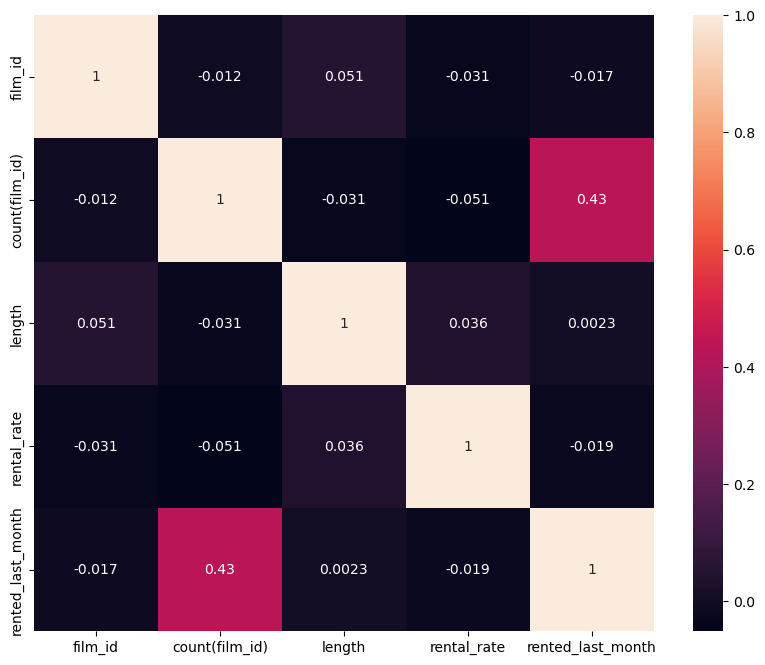

In [7]:
y = data2[['rented_last_month']]

X = data1

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [9]:
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train_num.columns
X_train_norm.shape

(766, 4)

<Figure size 1400x2500 with 0 Axes>

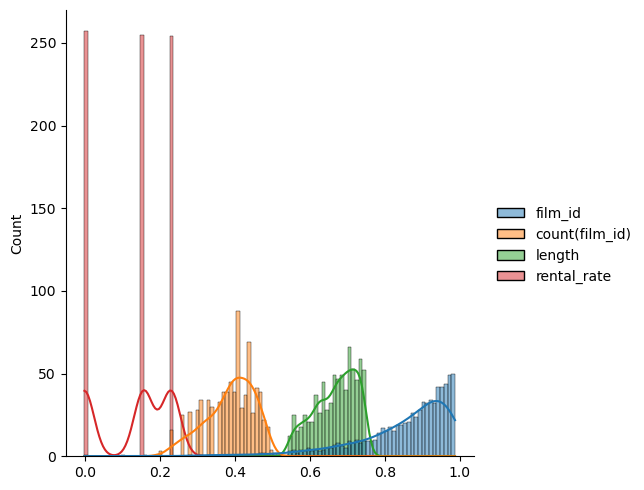

In [10]:
plt.figure(figsize = (14,25))
sns.displot(X_train_num.apply(np.log)/7, bins=100, kde=True)

plt.show()

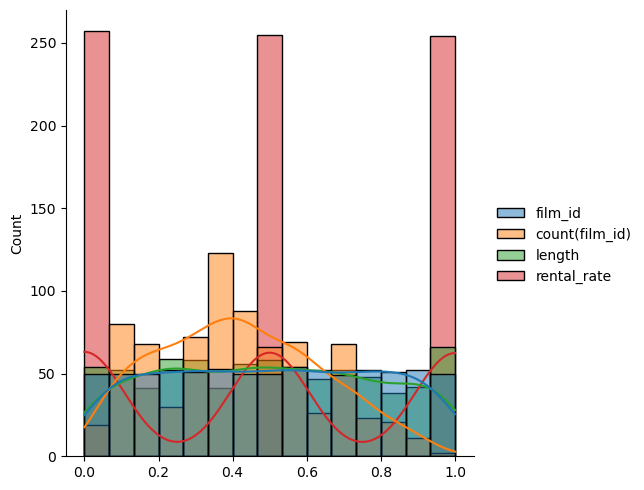

In [11]:
sns.displot(X_train_norm, kde=True)
plt.show()

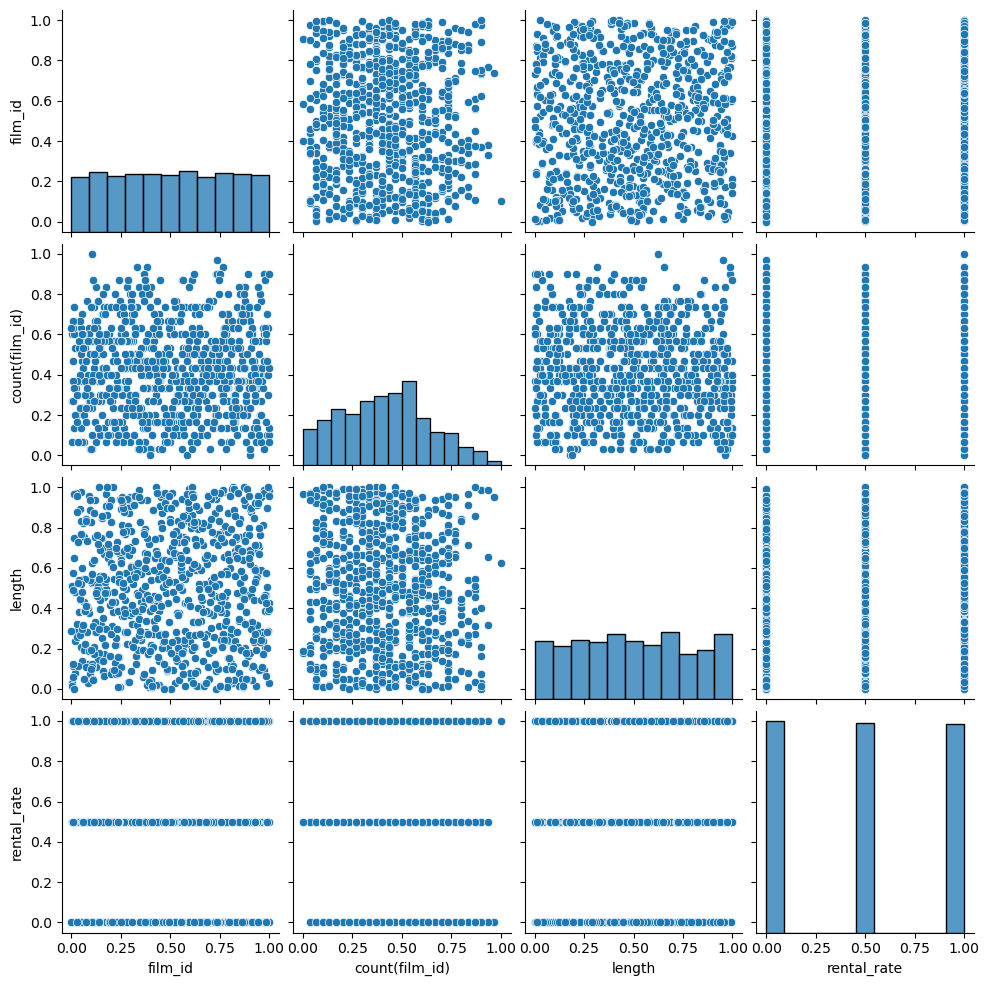

In [12]:
sns.pairplot(X_train_norm)

In [13]:
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder().fit(X_cat)
X_train_cat = X_train.select_dtypes(include = np.object)

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
encoded.shape


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_27860\3255309888.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)


(766, 783)

In [14]:
cols=[]
for row in encoder.categories_:
    for colname in row:
        cols.append(colname)
        
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,title_ALAMO VIDEOTAPE,title_ALASKA PHANTOM,title_ALI FOREVER,...,"special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X_train_transformed = pd.concat([X_train_norm, onehot_encoded], axis=1)
X_train_transformed

,film_id,count(film_id),length,rental_rate,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,...,"special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.113113,0.733333,0.107914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.723724,0.466667,0.460432,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.895896,0.366667,0.798561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.444444,0.700000,0.388489,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.962963,0.400000,0.230216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.562563,0.866667,0.856115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
762,0.491491,0.166667,0.633094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
763,0.757758,0.133333,0.568345,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.373373,0.866667,0.510791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train) 

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:

X_test_num = X_test.select_dtypes(include = np.number)

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

X_test_cat = X_test.select_dtypes(include = np.object)

cols1=[]
for row in encoder.categories_:
    for colname in row:
        cols1.append(colname)

cols1 = encoder.get_feature_names(input_features=X_test_cat.columns)
onehot_encoded1 = pd.DataFrame(encoded, columns=cols1)
onehot_encoded1

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_27860\2688076758.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)
c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,title_ALAMO VIDEOTAPE,title_ALASKA PHANTOM,title_ALI FOREVER,...,"special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X_test_transformed = pd.concat([X_test_norm, onehot_encoded1], axis=1)
X_test_transformed

,0,1,2,3,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,...,"special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.094094,0.433333,0.553957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.944945,0.800000,0.848921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.987988,0.366667,0.669065,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.160160,0.100000,0.172662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.024024,0.600000,0.201439,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
762,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
763,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
list(X_train_cat)==list(X_test_cat)

True

In [19]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').